In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#results = pd.read_csv('results.csv')
#t5large = results[results['model'] == 't5-large']
#t5small = results[results['model'] == 't5-small']
#length = t5large[t5large['task'] == 'sentence length']
#disc = t5large[t5large['task'] == 'discourse']
#depth = t5large[t5large['task'] == 'tree depth']
#number = t5large[t5large['task'] == 'subject number']
pdtb = pd.read_csv('bert_scores_PDTB.csv')
#pdtb.columns=['ind', 'epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
const = pd.read_csv('bert_scores_top_const.csv')
#const.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
conn = pd.read_csv('bert_scores_conn.csv')
#conn.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
depth = pd.read_csv('bert_tree_depth.csv')
#depth.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
person = pd.read_csv('bert_person.csv')
#person.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
dc = pd.read_csv('bert_scores_DC.csv')
number = pd.read_csv('bert_scores_subj_number.csv')
#sent_order = pd.read_csv('bert_scores_SP.csv')

In [12]:
pdtb

,Unnamed: 0,epoche,layer,accuracy,precision,recall,f1-score
0,0,0,0,0.295599,0.295599,0.295599,0.177573
1,1,0,1,0.296983,0.296983,0.296983,0.180229
2,2,0,2,0.296153,0.296153,0.296153,0.183558
3,3,0,3,0.297813,0.297813,0.297813,0.178287
4,4,0,4,0.304456,0.304456,0.304456,0.177489
...,...,...,...,...,...,...,...
79,79,1100000,2,0.332411,0.332411,0.332411,0.217315
80,80,1100000,3,0.334625,0.334625,0.334625,0.213499
81,81,1100000,4,0.341821,0.341821,0.341821,0.212895
82,82,1100000,5,0.345143,0.345143,0.345143,0.217054


In [30]:
layer = depth.iloc[:7]['layer'].values

In [31]:
layer

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [7]:
#fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)
#epoches = 1100000
#x = 0
#j = 0
#for i in range(0, epoches, 100000):
#    layers = ax[x, j].plot(layer, t5small[t5small['epoche']==i]['accuracy'], label='t5small', marker='o')
#    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='t5large', marker='^')
#    layers = ax[x, j].set_xlabel('layers')
#    layers = ax[x, j].set_ylabel('score')
#    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
#    if j != 3:
#        j += 1
#    else:
#        j = 0
#        x += 1
#
#handles, labels = ax[0, 0].get_legend_handles_labels()
#fig.suptitle(f'Comparison of T5-large and T5-small', size=40)
#fig.legend(handles, labels, loc='lower center', prop={'size':40})
#plt.show()

In [8]:
person

,Unnamed: 0,epoche,layer,accuracy,precision,recall,f1-score
0,0,0,0,0.829468,0.829468,0.829468,0.625800
1,1,0,1,0.829119,0.829119,0.829119,0.625035
2,2,0,2,0.827724,0.827724,0.827724,0.621547
3,3,0,3,0.828248,0.828248,0.828248,0.623334
4,4,0,4,0.827724,0.827724,0.827724,0.624094
...,...,...,...,...,...,...,...
79,79,1100000,2,0.828771,0.828771,0.828771,0.636103
80,80,1100000,3,0.829643,0.829643,0.829643,0.637761
81,81,1100000,4,0.829119,0.829119,0.829119,0.630034
82,82,1100000,5,0.831735,0.831735,0.831735,0.624607


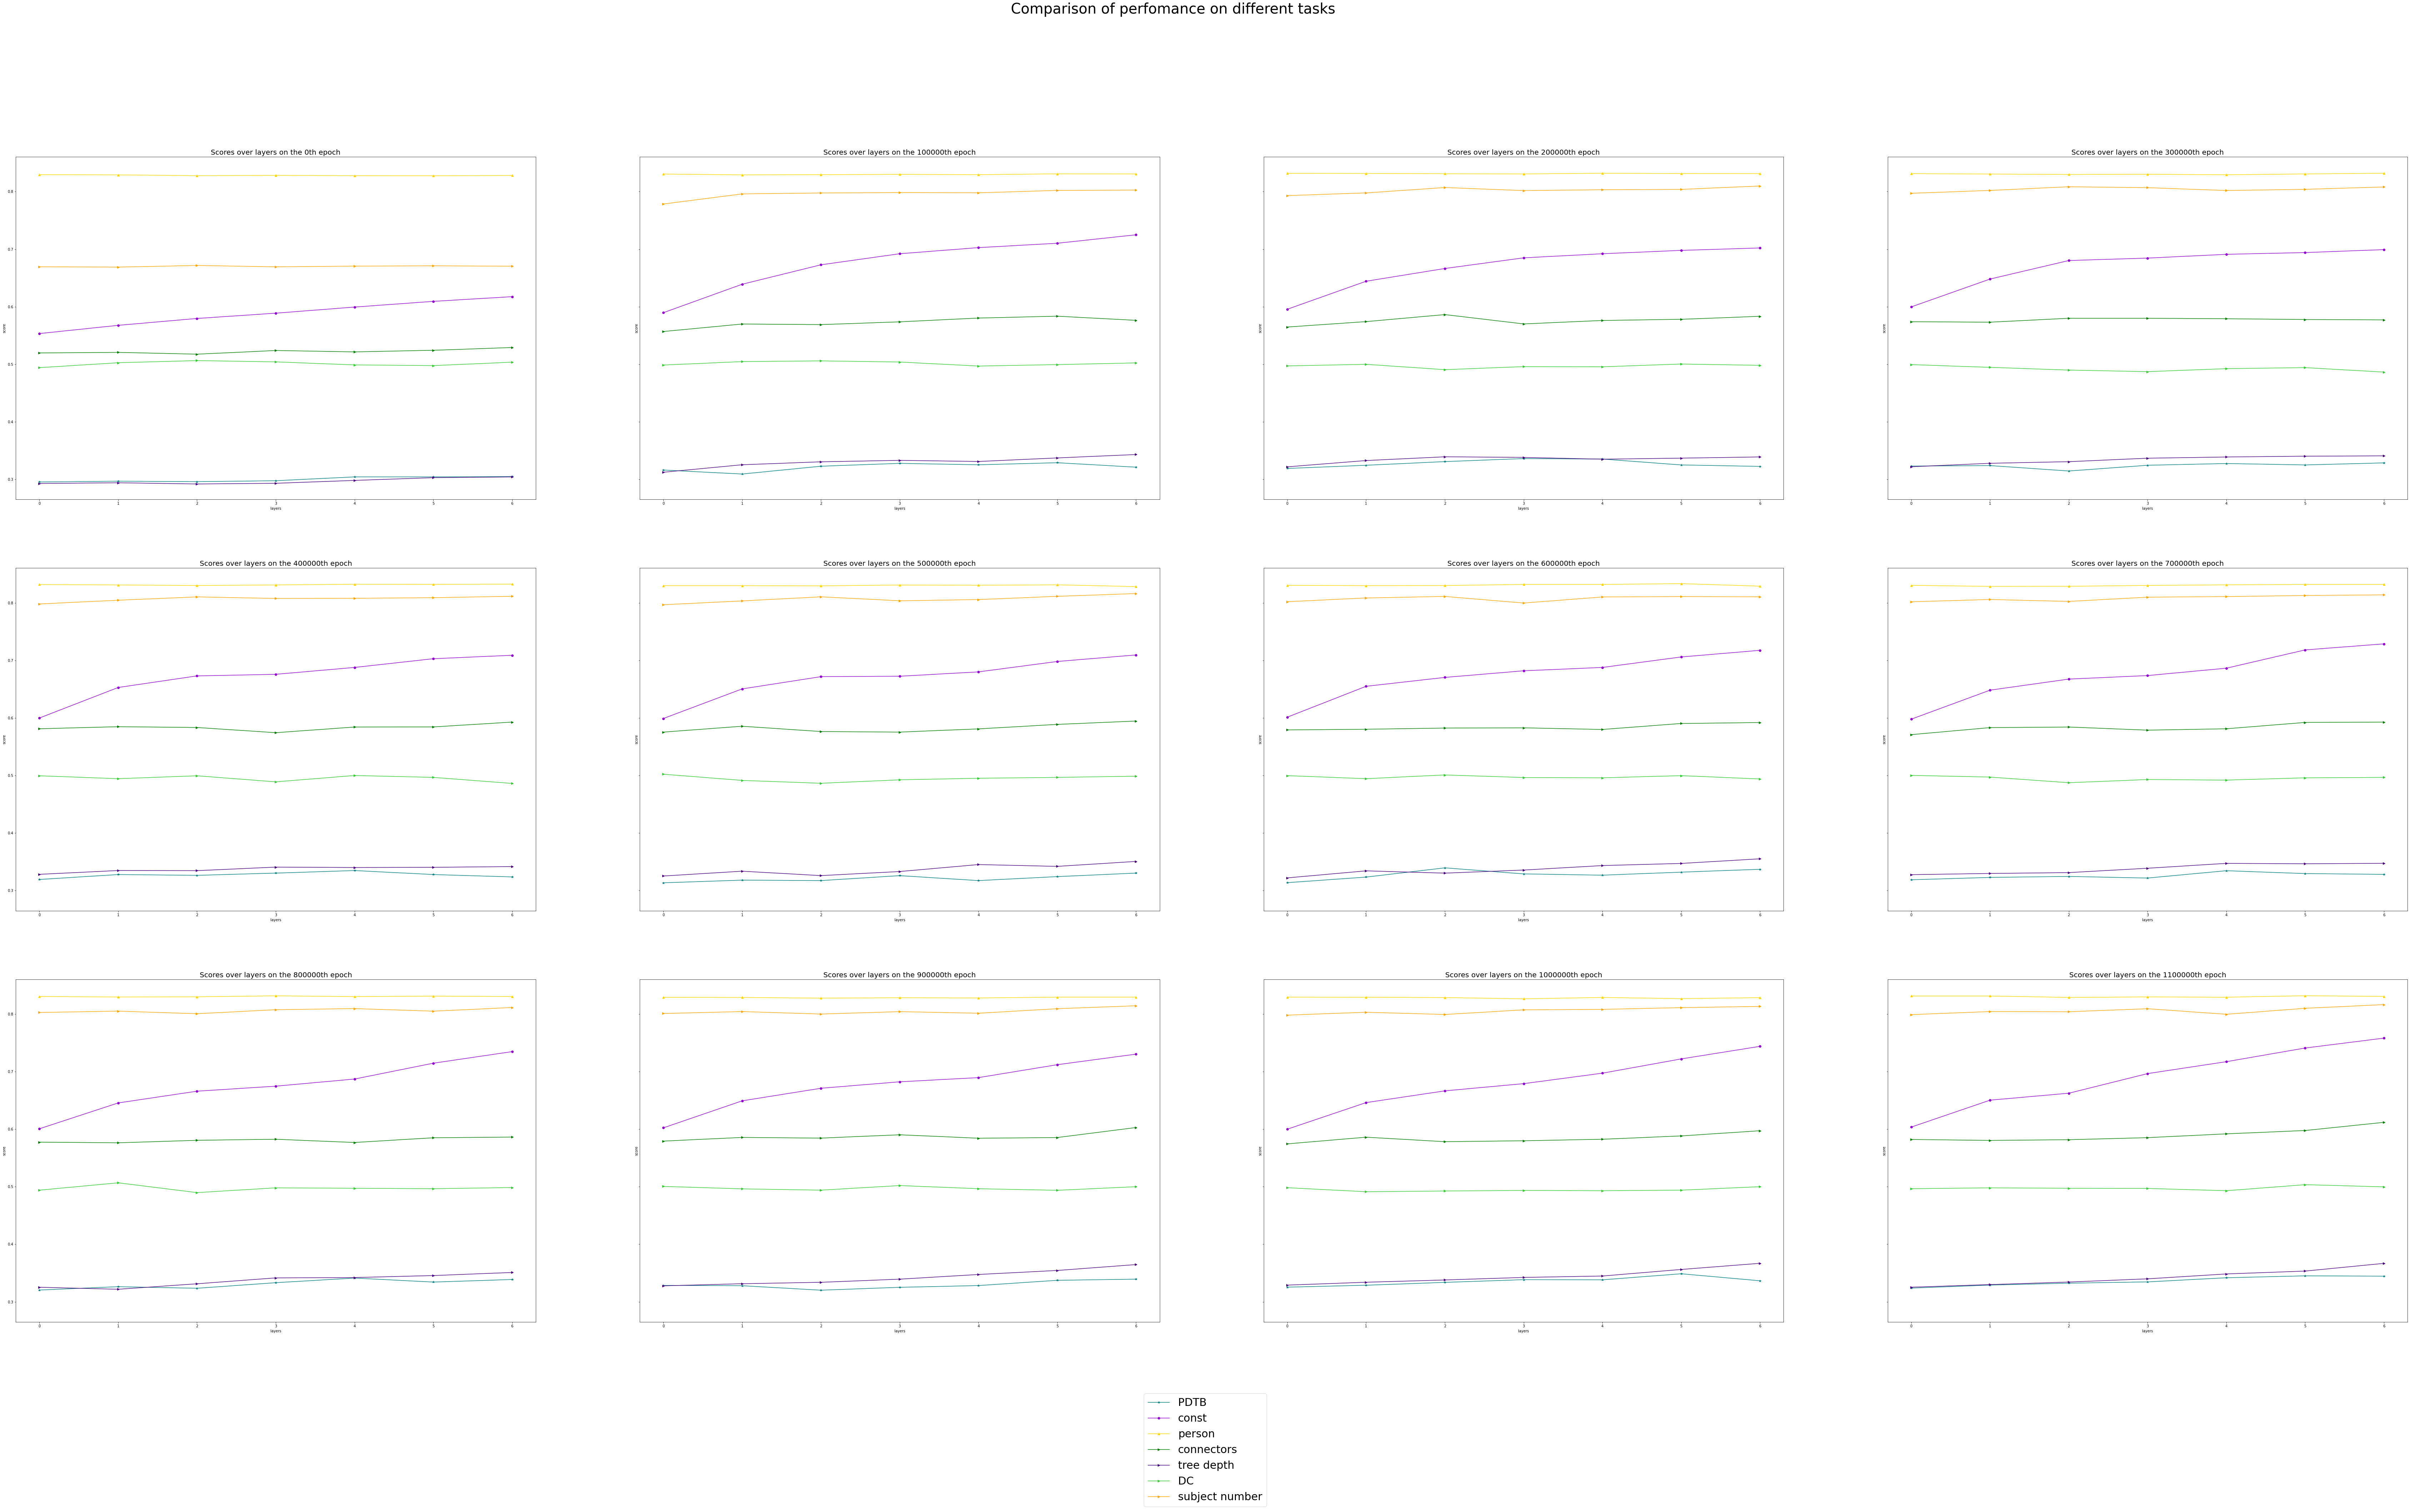

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(120, 60), sharey=True)

epoches = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
x = 0
j = 0
for i in range(0, epoches, 100000):
    layers = ax[x, j].plot(layer, pdtb[pdtb['epoche']==i]['accuracy'], label='PDTB', color='teal', marker='*')
    layers = ax[x, j].plot(layer, const[const['epoche']==i]['accuracy'], label='const', color='darkviolet',marker='o')
    layers = ax[x, j].plot(layer, person[person['epoche']==i]['accuracy'], label='person', color='gold', marker='^')
    layers = ax[x, j].plot(layer, conn[conn['epoche']==i]['accuracy'], label='connectors', color='green', marker='>')
    layers = ax[x, j].plot(layer, depth[depth['epoche']==i]['accuracy'], label='tree depth', color='indigo', marker='>')
    layers = ax[x, j].plot(layer, dc[dc['epoche']==i]['accuracy'], label='DC', color='limegreen', marker='>')
    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='subject number', color='orange', marker='>')
    #layers = ax[x, j].plot(layer, sent_order[sent_order['epoche']==i]['accuracy'], label='sentence order', color='purple', marker='>')
    layers = ax[x, j].set_xlabel('layers')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':30})
plt.show()

In [23]:
def plot_accuracy(df, task):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)

    x = 0
    j = 0
    epoches = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
    layer = df.iloc[:7]['layer']
    colours = [[1, 0, 0], [0.2, 1, 0], [0, 0.5, 1], [0.7, 0.5, 0]]
    for i in range(0, len(epoches), 3):
        r, b, g = colours[i//3]
        i = i * 100000
        layers = ax[x, j].plot(layer, df[df['epoche'] == i]['accuracy'], color=(r, b, g, 0.3), label=i)
        layers = ax[x, j].plot(layer, df[df['epoche'] == i+100000]['accuracy'],color=(r, b, g, 0.5), label=i+100000)
        layers = ax[x, j].plot(layer, df[df['epoche'] == i+200000]['accuracy'], color=(r, b, g, 0.8), label=i+200000)
        layers = ax[x, j].set_xlabel('layers')
        layers = ax[x, j].set_ylabel('score')
        layers = ax[x, j].set_title(f'Scores over layers on the {i}, {i+100000}, and {i+200000}th epoches')
        if j != 1:
            j += 1
        else:
            j = 0
            x += 1
    fig.suptitle(f'Accuracy on {task}', size=20)
    fig.legend()
    plt.show()

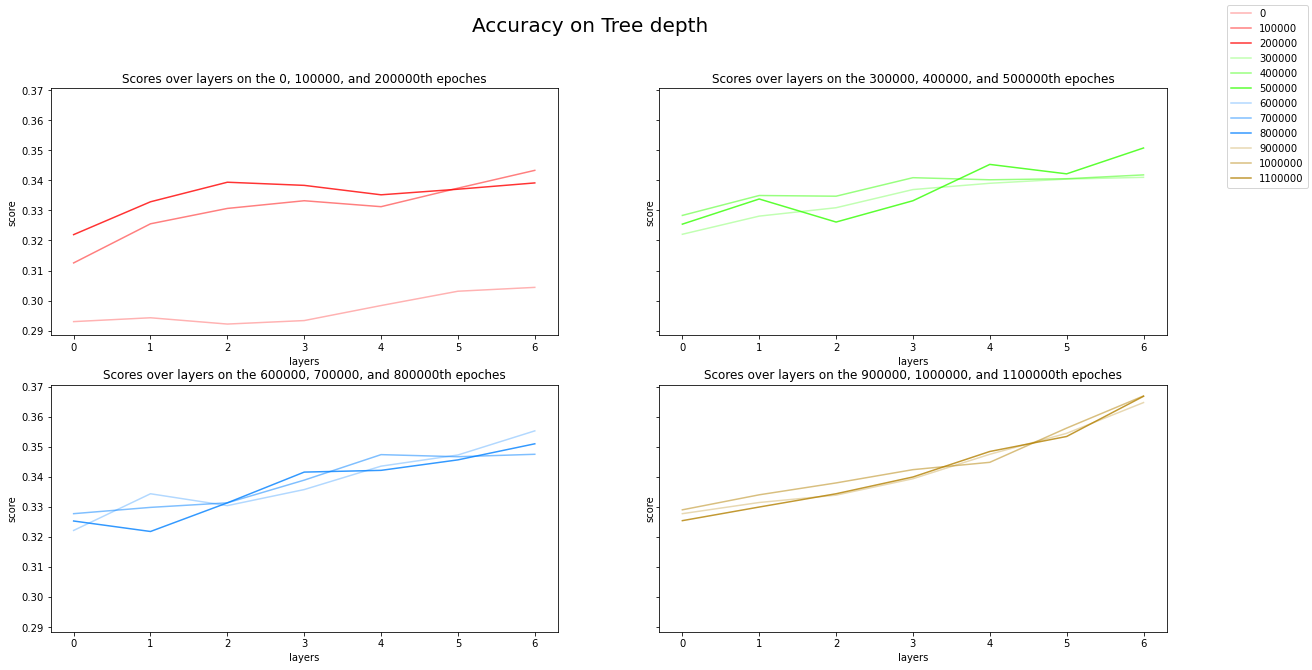

In [24]:
plot_accuracy(depth, 'Tree depth')

In [25]:
person

,Unnamed: 0,epoche,layer,accuracy,precision,recall,f1-score
0,0,0,0,0.829468,0.829468,0.829468,0.625800
1,1,0,1,0.829119,0.829119,0.829119,0.625035
2,2,0,2,0.827724,0.827724,0.827724,0.621547
3,3,0,3,0.828248,0.828248,0.828248,0.623334
4,4,0,4,0.827724,0.827724,0.827724,0.624094
...,...,...,...,...,...,...,...
79,79,1100000,2,0.828771,0.828771,0.828771,0.636103
80,80,1100000,3,0.829643,0.829643,0.829643,0.637761
81,81,1100000,4,0.829119,0.829119,0.829119,0.630034
82,82,1100000,5,0.831735,0.831735,0.831735,0.624607


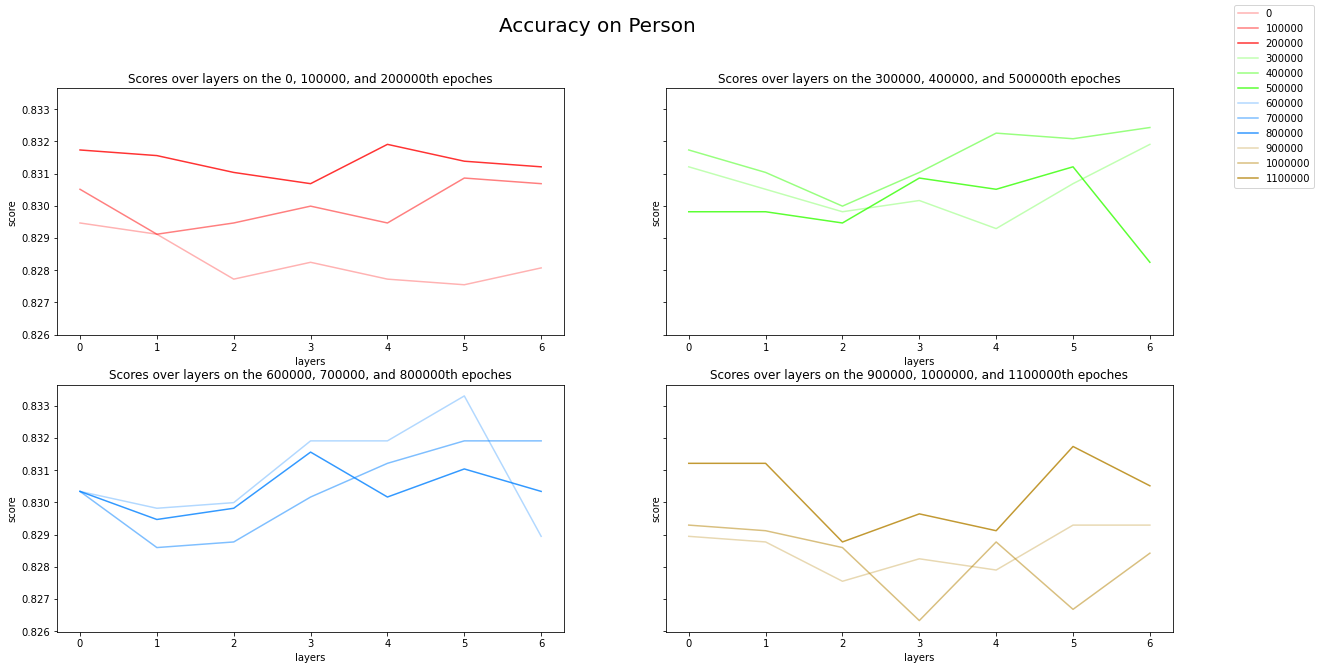

In [26]:
plot_accuracy(person, 'Person')

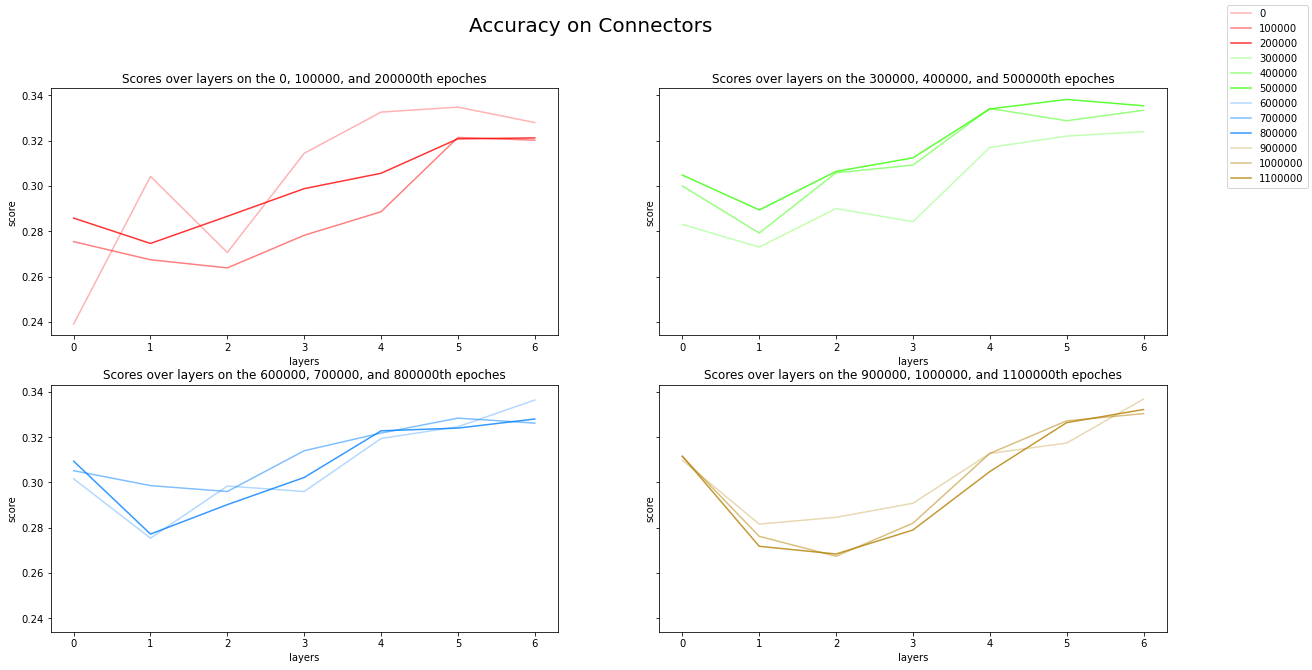

In [58]:
plot_accuracy(conn, 'Connectors')

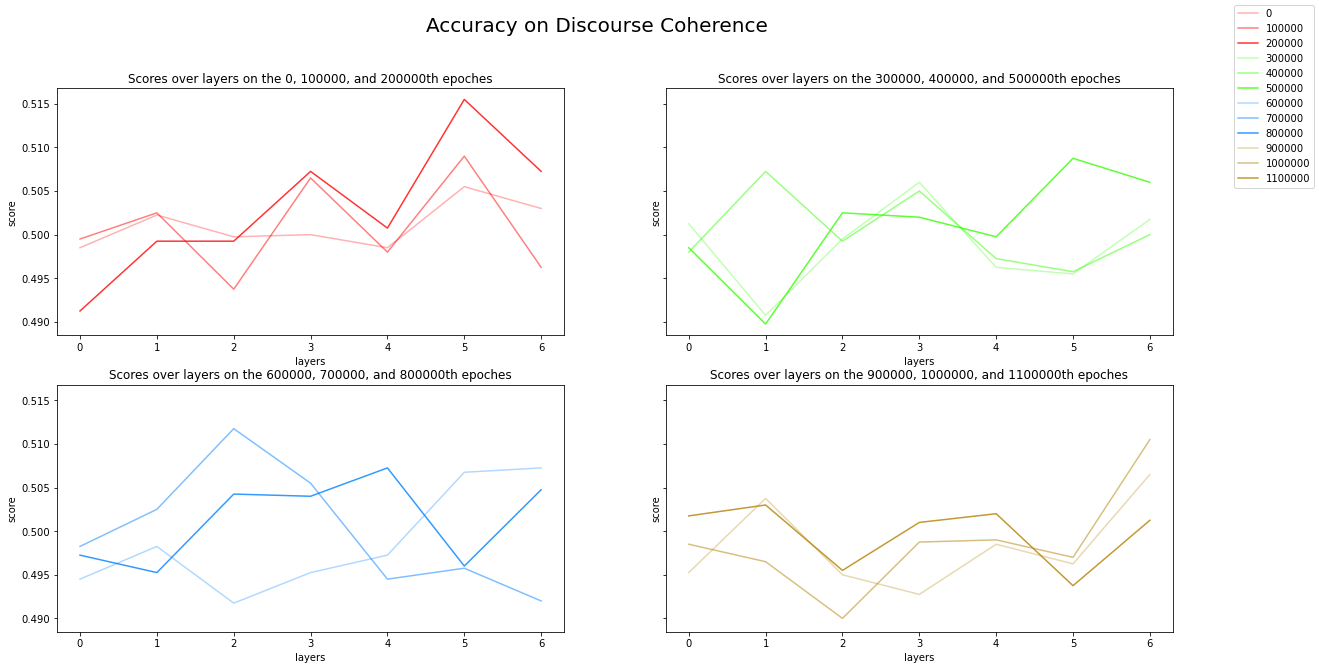

In [59]:
plot_accuracy(dc, 'Discourse Coherence')

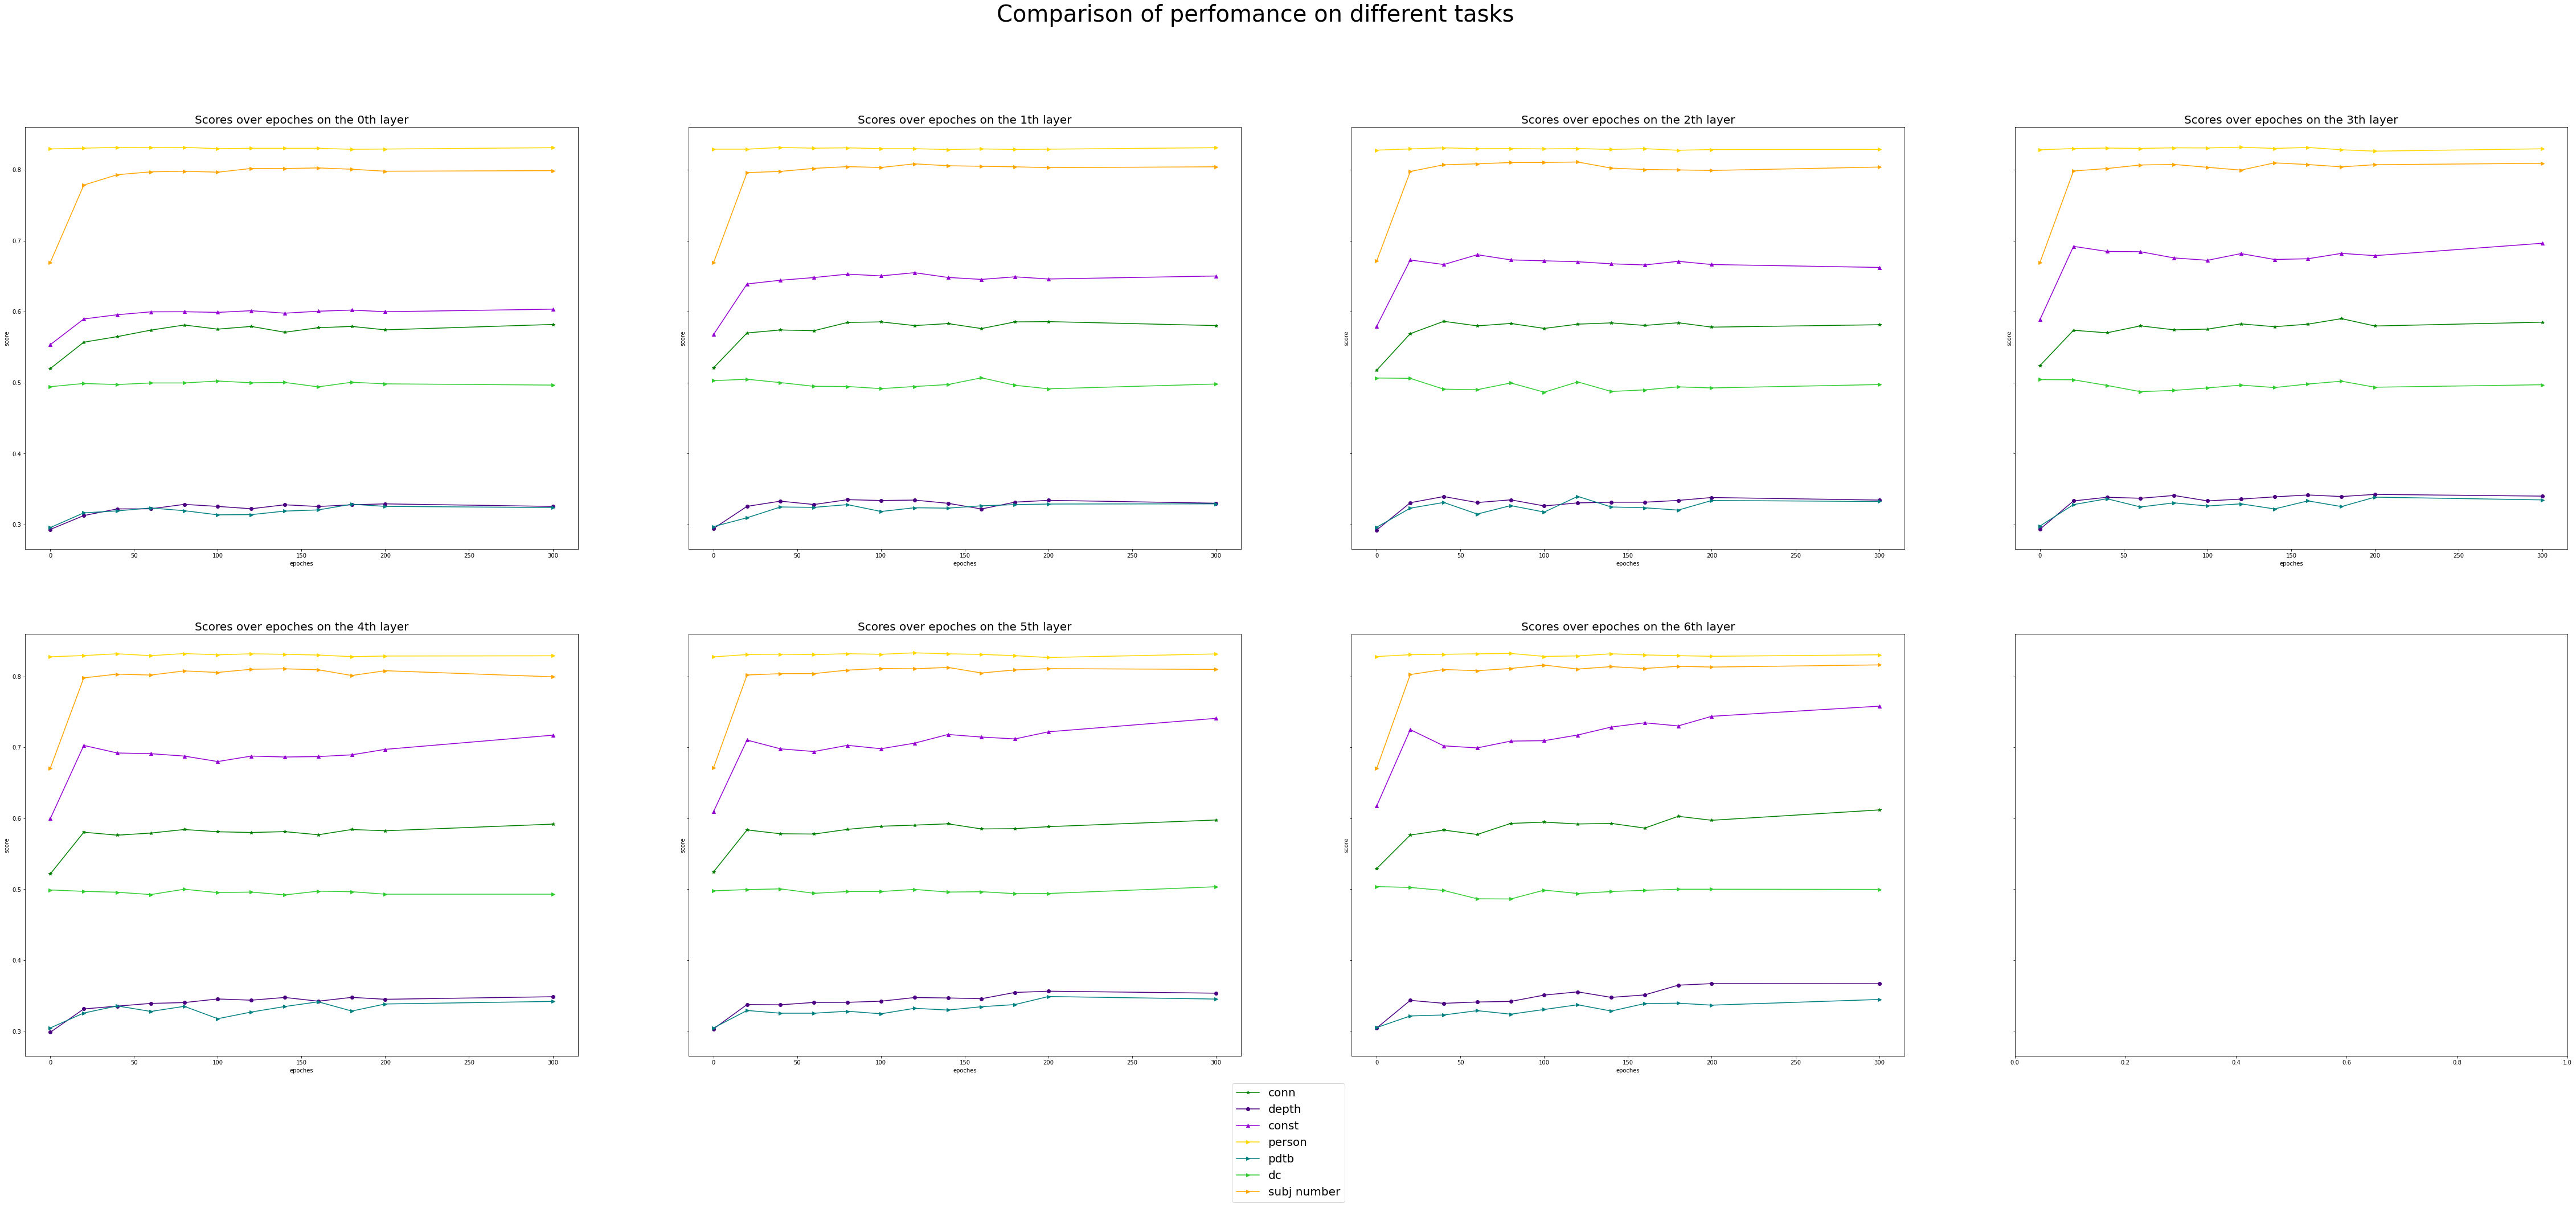

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(80, 30), sharey=True)

l = 7
epoches = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
x = 0
j = 0
for i in range(l):
    layers = ax[x, j].plot(epoches, conn[conn['layer']==i].sort_values('epoche')['accuracy'], color='green', label='conn', marker='*')
    layers = ax[x, j].plot(epoches, depth[depth['layer']==i].sort_values('epoche')['accuracy'], color='indigo', label='depth', marker='o')
    layers = ax[x, j].plot(epoches, const[const['layer']==i].sort_values('epoche')['accuracy'], color='darkviolet',label='const', marker='^')
    layers = ax[x, j].plot(epoches, person[person['layer']==i].sort_values('epoche')['accuracy'], color='gold',label='person', marker='>')
    layers = ax[x, j].plot(epoches, pdtb[pdtb['layer']==i].sort_values('epoche')['accuracy'], color='teal', label='pdtb', marker='>')
    layers = ax[x, j].plot(epoches, dc[dc['layer']==i].sort_values('epoche')['accuracy'], color='limegreen', label='dc', marker='>')
    layers = ax[x, j].plot(epoches, number[number['layer']==i].sort_values('epoche')['accuracy'],color='orange', label='subj number', marker='>')
    #layers = ax[x, j].plot(epoches, sent_order[sent_order['layer']==i].sort_values('epoche')['accuracy'], color='purple', label='sentence order', marker='>')
    layers = ax[x, j].set_xlabel('epoches')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over epoches on the {i}th layer', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':20})
plt.show()

In [16]:
metrics_A = [0.0,
 0.338,
 0.317,
 0.275,
 0.338,
 0.365,
 0.335,
 0.327,
 0.361,
 0.34,
 0.303,
 0.312]
metrics_transitive = [0.0,
 0.475,
 0.571,
 0.506,
 0.551,
 0.606,
 0.562,
 0.551,
 0.542,
 0.471,
 0.555,
 0.49]
metrics_passive = [0.0,
 0.519,
 0.549,
 0.525,
 0.519,
 0.554,
 0.535,
 0.526,
 0.51,
 0.513,
 0.504,
 0.523]
metrics_island = [0.0,
 0.73,
 0.829,
 0.668,
 0.684,
 0.731,
 0.826,
 0.746,
 0.789,
 0.571,
 0.79,
 0.567]

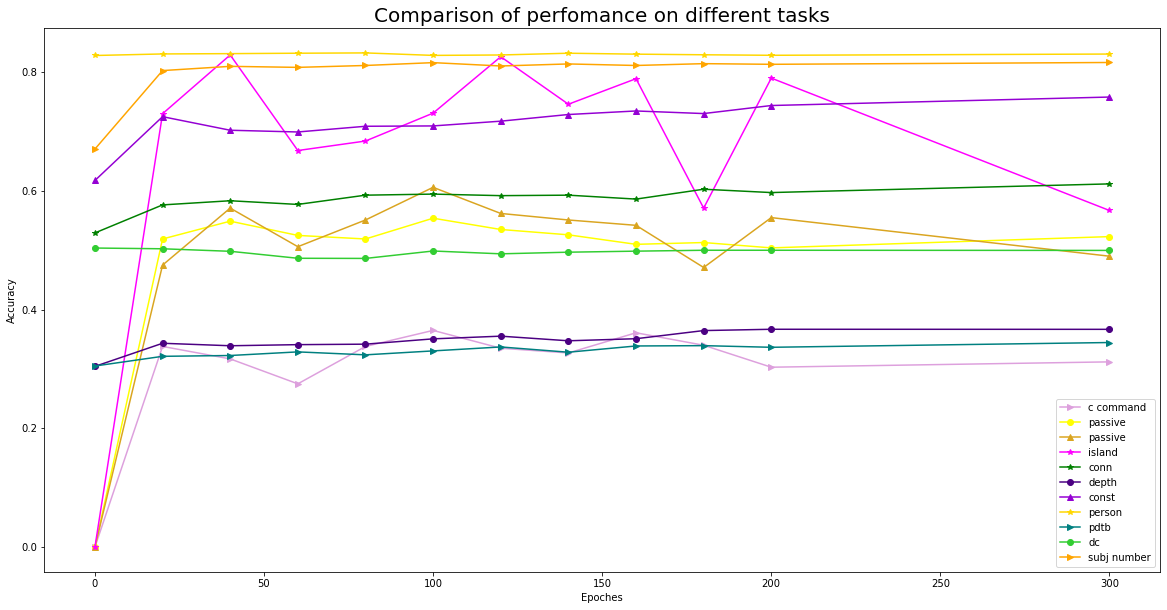

In [45]:
plt.figure(figsize=(20,10))
epoches = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
plt.plot(epoches, metrics_A, label='c command', color='plum', marker='>')
plt.plot(epoches, metrics_passive, label='passive', color='yellow', marker='o')
plt.plot(epoches, metrics_transitive, label='passive', color='goldenrod', marker='^')
plt.plot(epoches, metrics_island, label='island', color='fuchsia', marker='*')
plt.plot(epoches, conn[conn['layer']==6].sort_values('epoche')['accuracy'].values, color='green', label='conn', marker='*')
plt.plot(epoches, depth[depth['layer']==6].sort_values('epoche')['accuracy'].values, color='indigo', label='depth', marker='o')
plt.plot(epoches, const[const['layer']==6].sort_values('epoche')['accuracy'].values, color='darkviolet',label='const', marker='^')
plt.plot(epoches, person[person['layer']==6].sort_values('epoche')['accuracy'].values, color='gold',label='person', marker='*')
plt.plot(epoches, pdtb[pdtb['layer']==6].sort_values('epoche')['accuracy'].values, color='teal', label='pdtb', marker='>')
plt.plot(epoches, dc[dc['layer']==6].sort_values('epoche')['accuracy'].values, color='limegreen', label='dc', marker='o')
plt.plot(epoches, number[number['layer']==6].sort_values('epoche')['accuracy'].values,color='orange', label='subj number', marker='>')  
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title(f'Comparison of perfomance on different tasks', size=20)
plt.show()